In [80]:
import matplotlib.pyplot as plt

In [81]:
def pricing_model(current_proportions, target_proportions, current_price, base_scale, base_price_increase, k_range):
    for k in k_range:
        new_prices = [current_price + k * (base_scale ** i) * (current_p - target_p) + base_price_increase * i
                      for i, (current_p, target_p) in enumerate(zip(current_proportions, target_proportions))]
        
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(current_proportions)), new_prices, label=f'k={k}')
        plt.title(f'New Prices by Congestion Bucket for k = {k}')
        plt.xlabel('Congestion Bucket')
        plt.ylabel('New Price')
        plt.legend()
        plt.grid(True)
        plt.show()

In [82]:
def base_bucket_model(current_proportions, target_proportions, current_price, base_scale, base_bucket, k_range, base_price_increase):
    for k in k_range:
        new_prices = []
        for i, (current_p, target_p) in enumerate(zip(current_proportions, target_proportions)):
            if i == base_bucket:
                new_price = current_price
            else:
                price_adjustment = k * (base_scale ** abs(i - base_bucket)) * (current_p - target_p)
                if i > base_bucket:
                    price_adjustment += base_price_increase * (i - base_bucket)
                else:
                    price_adjustment -= base_price_increase * (base_bucket - i)
                new_price = current_price + price_adjustment
            new_prices.append(new_price)
        
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(current_proportions)), new_prices, label=f'k={k}', marker='o', linestyle='-')
        plt.title(f'New Prices by Congestion Bucket for k = {k}')
        plt.xlabel('Congestion Bucket')
        plt.ylabel('New Price')
        plt.axhline(y=current_price, color='r', linestyle='--', label="Base Price (Bucket 4)")
        plt.legend()
        plt.grid(True)
        plt.show()

In [83]:
def base_bucket_model_experimental(current_proportions, target_proportions, current_price, base_scale, base_bucket, k_range, base_price_increase):
    results = {}
    for k in k_range:
        for scale in base_scale:
            for increase in base_price_increase:
                new_prices = []
                strictly_increasing = True
                last_price = -float('inf')
                
                for i, (current_p, target_p) in enumerate(zip(current_proportions, target_proportions)):
                    if i == base_bucket:
                        new_price = current_price
                    else:
                        price_adjustment = k * (scale ** abs(i - base_bucket)) * (current_p - target_p)
                        if i > base_bucket:
                            price_adjustment += increase * (i - base_bucket)
                        else:
                            price_adjustment -= increase * (base_bucket - i)
                        new_price = current_price + price_adjustment
                    
                    if new_price <= last_price:
                        strictly_increasing = False
                    last_price = new_price
                    new_prices.append(new_price)
                
                if strictly_increasing:
                    results[(k, scale, increase)] = new_prices
                    plt.figure(figsize=(10, 5))
                    plt.plot(range(len(current_proportions)), new_prices, marker='o', linestyle='-')
                    plt.axhline(y=current_price, color='r', linestyle='--', label="Base Price (Bucket 4)")
                    plt.title(f'Prices for k={k}, Scale={scale}, Increase={increase}')
                    plt.xlabel('Congestion Bucket')
                    plt.ylabel('Price')
                    plt.ylim(bottom=0)
                    plt.grid(True)
                    plt.show()

    return results

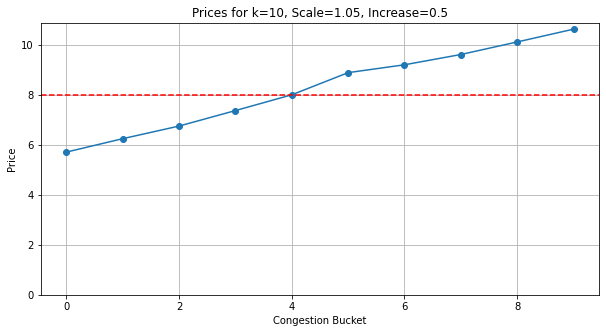

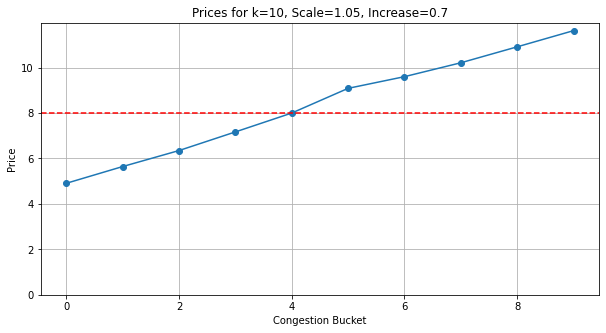

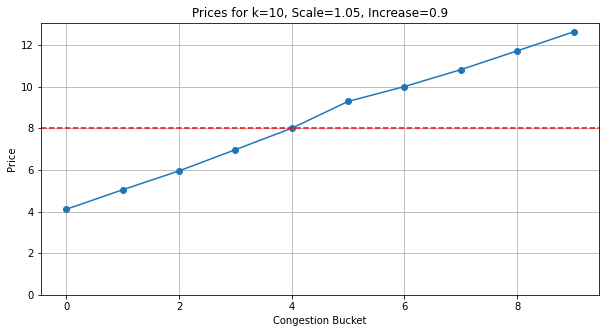

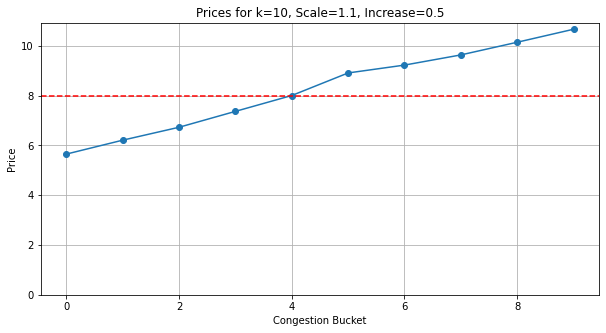

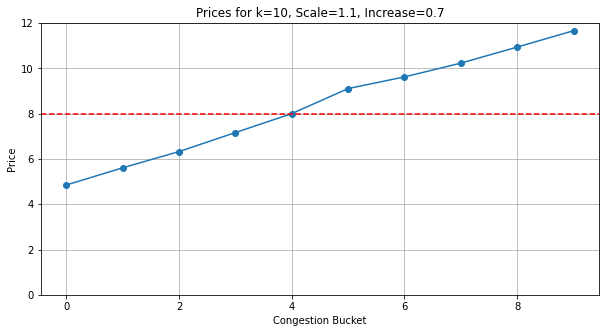

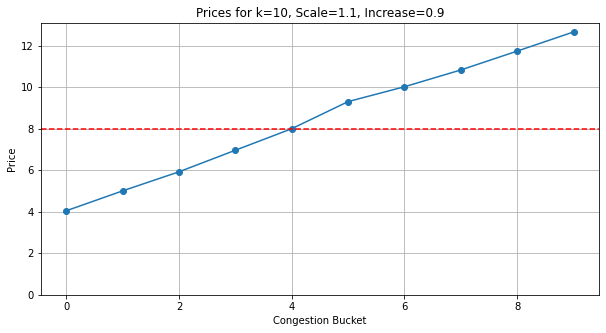

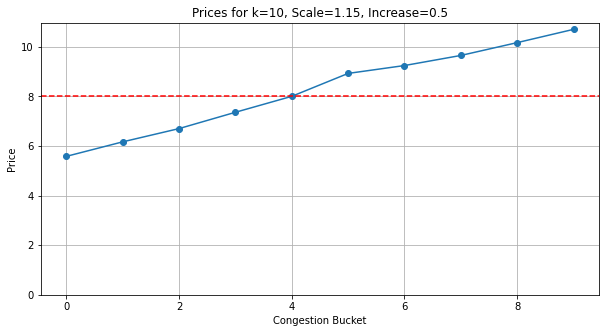

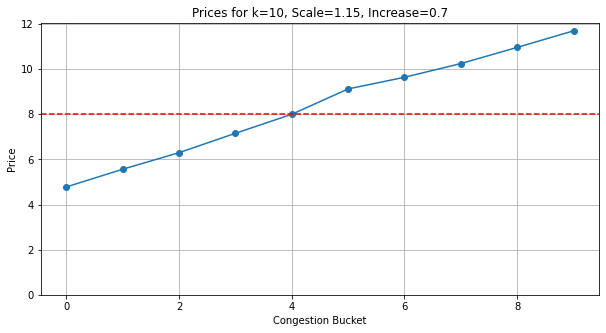

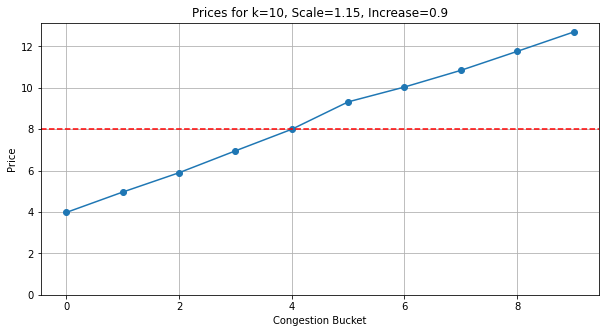

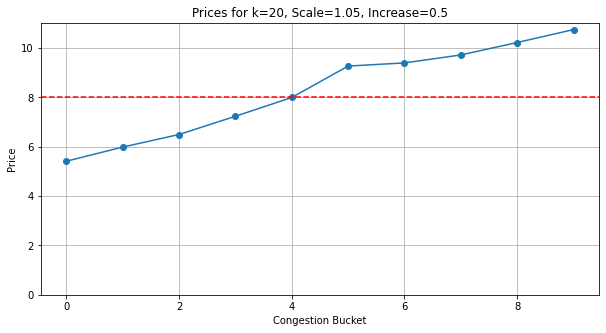

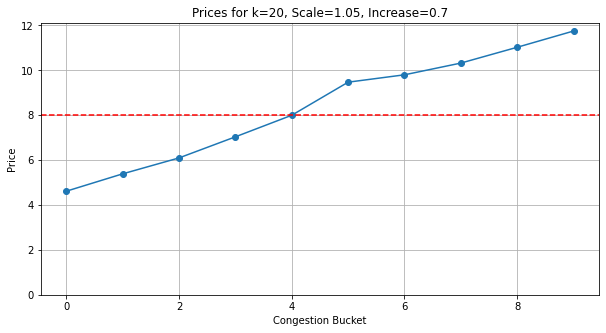

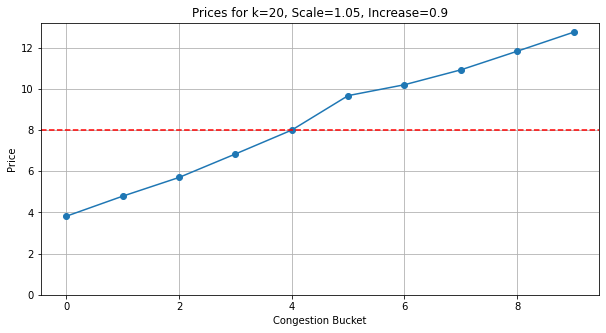

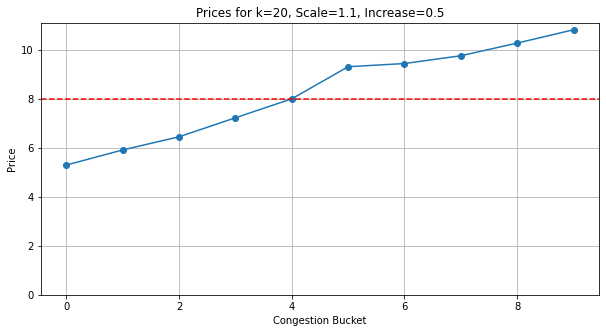

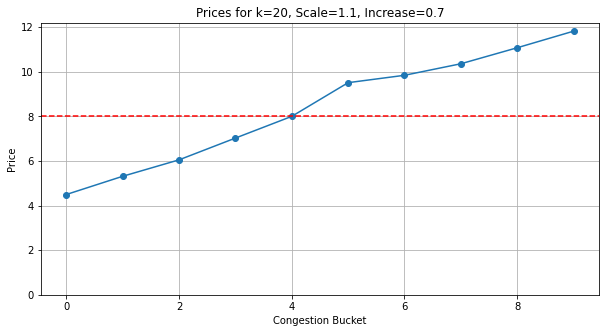

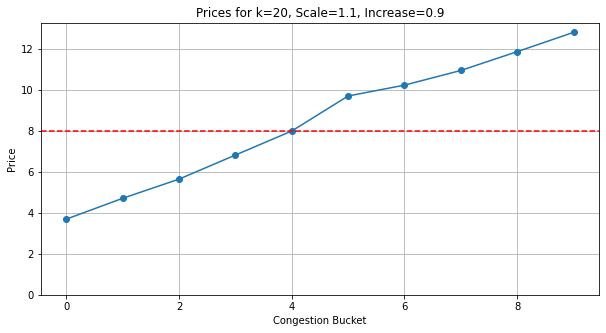

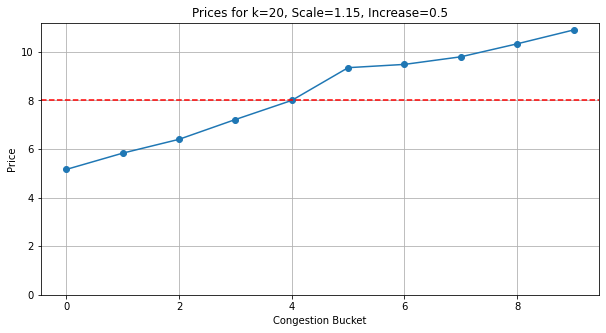

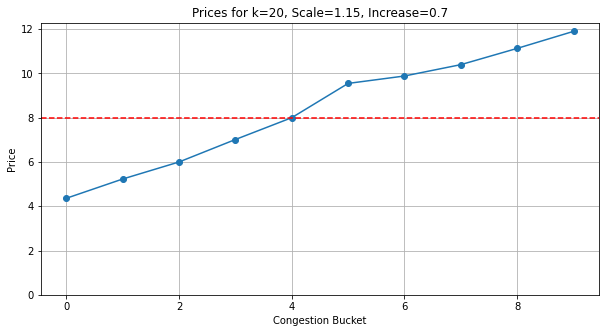

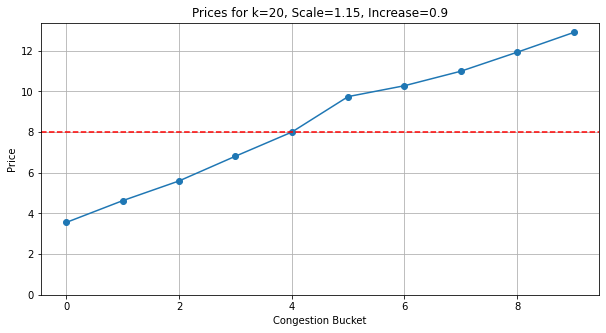

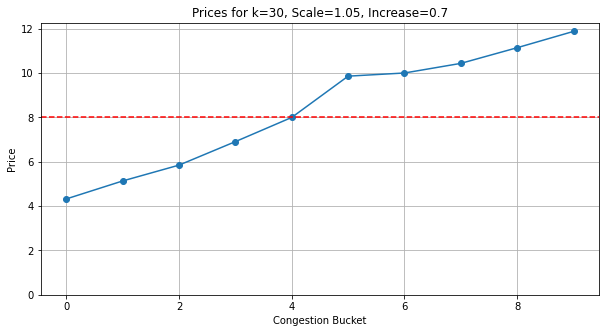

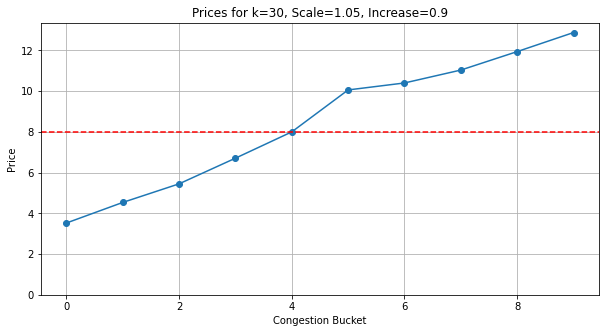

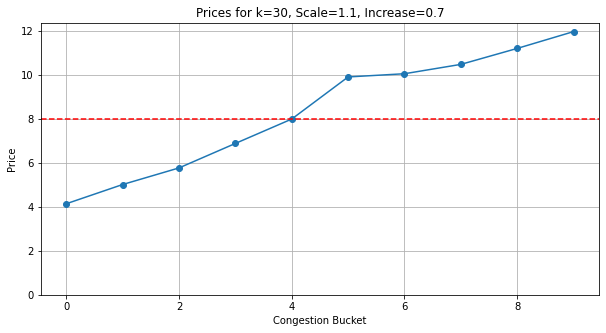

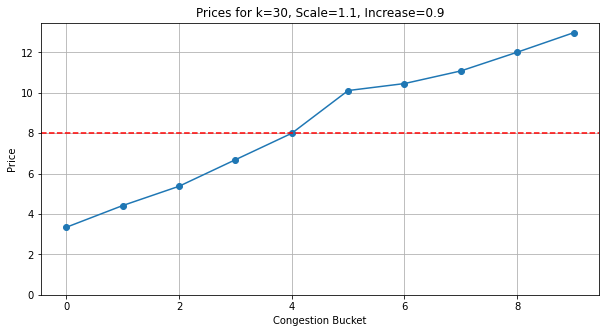

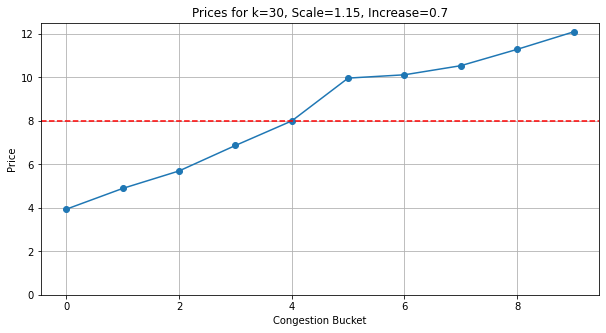

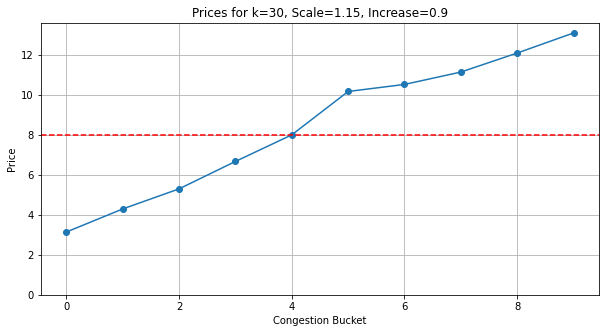

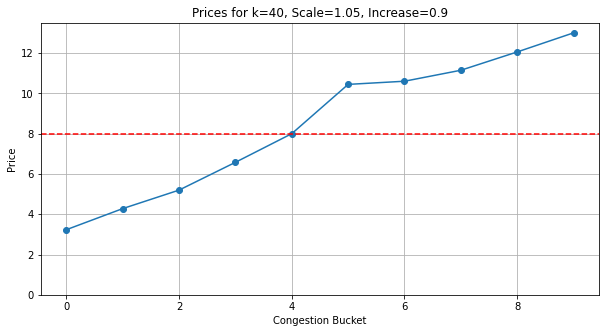

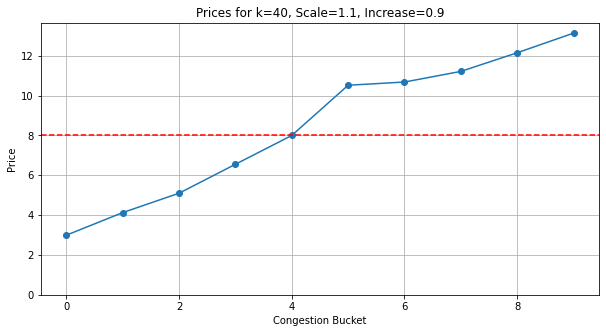

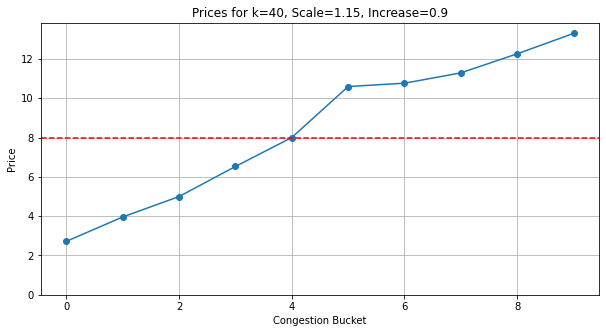

In [86]:
current_proportions = [0.17607206, 0.07766146, 0.11497712, 0.10846289, 0.13212514, 0.20613367,
                       0.10652815, 0.02549855, 0.0368258, 0.01571516]
target_proportions = [0.2001, 0.0997, 0.1377, 0.1209, 0.1350, 0.1693, 0.0883, 0.0158, 0.0274, 0.0058]
current_price = 8
base_scale = [1.05, 1.1, 1.15]
base_bucket = 4
k_range = range(10, 61, 10)
base_price_increase = [0, 0.5, 0.7, 0.9]

optimal_settings = base_bucket_model_experimental(current_proportions, target_proportions, current_price, base_scale, base_bucket, k_range, base_price_increase)

if not optimal_settings:
    print("No strictly increasing price set found. Consider adjusting the parameter ranges or the model.")